# An√°lise explorat√≥ria dos dados
_EDA - Exploratory Data Analysis_

---

## Sum√°rio

1. **Importa√ß√£o de bibliotecas**
2. **Carregamento da base**
3. **An√°lise do dataframe**
   - 3.1. Volumetria
   - 3.2. Tipagem, Nulos e Cardinalidade
   - 3.3. Duplicidade
   - 3.4. Medidas Estat√≠sticas
   - 3.5. Boxplot e Outliers das Vari√°veis Num√©ricas
   - 3.6. Distribui√ß√£o da Vari√°vel 'Car Purchase Amount'
4. **An√°lise explorat√≥ria dos dados**
   - 4.1. Qual a distribui√ß√£o da idade dos clientes?
   - 4.2. O g√™nero dos clientes est√° balanceado?
   - 4.3. H√° diferen√ßa de idade m√©dia entre g√™neros?

5. **Insights e recomenda√ß√µes**

<br>

---

<br>

## 1. Importa√ß√£o de bibliotecas

In [1]:
# Importa√ß√£o de pacotes e defini√ß√£o de par√¢metros globais

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import textwrap
import warnings
import gc

from scipy import stats

In [2]:
# Configura√ß√µes para exibi√ß√£o de dados no Jupyter Notebook

# Configurar op√ß√£o para exibir todas as linhas do Dataframe
pd.set_option('display.max_rows', None)

# Configurar para exibir o conte√∫do completo das colunas
pd.set_option('display.max_colwidth', None)

# Configurar a supress√£o de mensagens de aviso durante a execu√ß√£o
warnings.filterwarnings('ignore')

# Configurar estilo dos gr√°ficos do seaborn
sns.set_style('whitegrid')

## 2. Carregamento da base

In [3]:
# Efetuando a limpeza da mem√≥ria antes do carregamento dos dados
print(f'\nQuantidade de objetos removidos da mem√≥ria: {gc.collect()}')


Quantidade de objetos removidos da mem√≥ria: 0


In [4]:
# Criando um dataframe a partir do aquivo .csv
df = pd.read_csv('dados/Car_Purchasing_Data.csv', sep=',')
df.head()

Customer Name  \
0    Martina Avila   
1    Harlan Barnes   
2  Naomi Rodriquez   
3  Jade Cunningham   
4     Cedric Leach   

                                              Customer e-mail Country  Gender  \
0           cubilia.Curae.Phasellus@quisaccumsanconvallis.edu     USA       0   
1                                         eu.dolor@diam.co.uk     USA       0   
2  vulputate.mauris.sagittis@ametconsectetueradipiscing.co.uk     USA       1   
3                                     malesuada@dignissim.com     USA       1   
4              felis.ullamcorper.viverra@egetmollislectus.net     USA       1   

   Age  Annual Salary  Credit Card Debt    Net Worth  Car Purchase Amount  
0   42    62812.09301      11609.380910  238961.2505          35321.45877  
1   41    66646.89292       9572.957136  530973.9078          45115.52566  
2   43    53798.55112      11160.355060  638467.1773          42925.70921  
3   58    79370.03798      14426.164850  548599.0524          67422.36313  
4   57    59729.15130       5358.712177  560304.0671          55915.46248

## 3. An√°lise do dataframe

### 3.1. Volumetria

In [5]:
# Exibindo a quantidade de linhas e coluna do dataframe

print(f'Quantidade de linhas (registros):  {df.shape[0]}')
print(f'Quantidade de colunas (vari√°veis): {df.shape[1]}')    

Quantidade de linhas (registros):  500
Quantidade de colunas (vari√°veis): 9


### 3.2. Tipagem, Nulos e Cardinalidade

In [6]:
def gerar_metadados(dataframe):
    '''
    Gera um dataframe contendo metadados das colunas do dataframe fornecido.

    :param dataframe: Dataframe
        DataFrame para o qual os metadados ser√£o gerados.
    :return: DataFrame
        DataFrame contendo os metadados.
    '''
    metadados = pd.DataFrame({
        'Vari√°vel': dataframe.columns,
        'Tipo': dataframe.dtypes,
        'Qtde de nulos': dataframe.isnull().sum(),
        '% de nulos': round((dataframe.isnull().sum()/len(dataframe))*100, 2),
        'Cardinalidade': dataframe.nunique(),
    })
    metadados = metadados.sort_values(by='Qtde de nulos', ascending=False)
    metadados = metadados.reset_index(drop=True)
    return metadados

In [7]:
# Exibindo os metadados do dataframe

gerar_metadados(df)

Vari√°vel     Tipo  Qtde de nulos  % de nulos  Cardinalidade
0        Customer Name   object              0         0.0            498
1      Customer e-mail   object              0         0.0            500
2              Country   object              0         0.0              1
3               Gender    int64              0         0.0              2
4                  Age    int64              0         0.0             43
5        Annual Salary  float64              0         0.0            500
6     Credit Card Debt  float64              0         0.0            500
7            Net Worth  float64              0         0.0            500
8  Car Purchase Amount  float64              0         0.0            500

### 3.3. Duplicidade

In [8]:
# Exibindo a quantidade de registros √∫nicos e duplicados

contagem_duplicatas = df.duplicated().value_counts().rename(
    index={False: 'Registros √∫nicos', True: 'Registros duplicados'})
print(contagem_duplicatas)


Registros √∫nicos    500
Name: count, dtype: int64


### 3.4. Medidas Estat√≠sticas

In [9]:
df.describe().T

count           mean            std      min  \
Gender               500.0       0.506000       0.500465      0.0   
Age                  500.0      46.224000       7.990339     20.0   
Annual Salary        500.0   62127.239608   11703.378228  20000.0   
Credit Card Debt     500.0    9607.645049    3489.187973    100.0   
Net Worth            500.0  431475.713625  173536.756340  20000.0   
Car Purchase Amount  500.0   44209.799218   10773.178744   9000.0   

                               25%            50%            75%        max  
Gender                    0.000000       1.000000       1.000000        1.0  
Age                      41.000000      46.000000      52.000000       70.0  
Annual Salary         54391.977195   62915.497035   70117.862005   100000.0  
Credit Card Debt       7397.515792    9655.035568   11798.867487    20000.0  
Net Worth            299824.195900  426750.120650  557324.478725  1000000.0  
Car Purchase Amount   37629.896040   43997.783390   51254.709517    80000.0

In [10]:
df.describe(exclude=('float','int')).T

count unique  \
Customer Name     500    498   
Customer e-mail   500    500   
Country           500      1   

                                                               top freq  
Customer Name                                                 Seth    2  
Customer e-mail  cubilia.Curae.Phasellus@quisaccumsanconvallis.edu    1  
Country                                                        USA  500

### 3.5. Boxplot e Outliers das Vari√°veis Num√©ricas

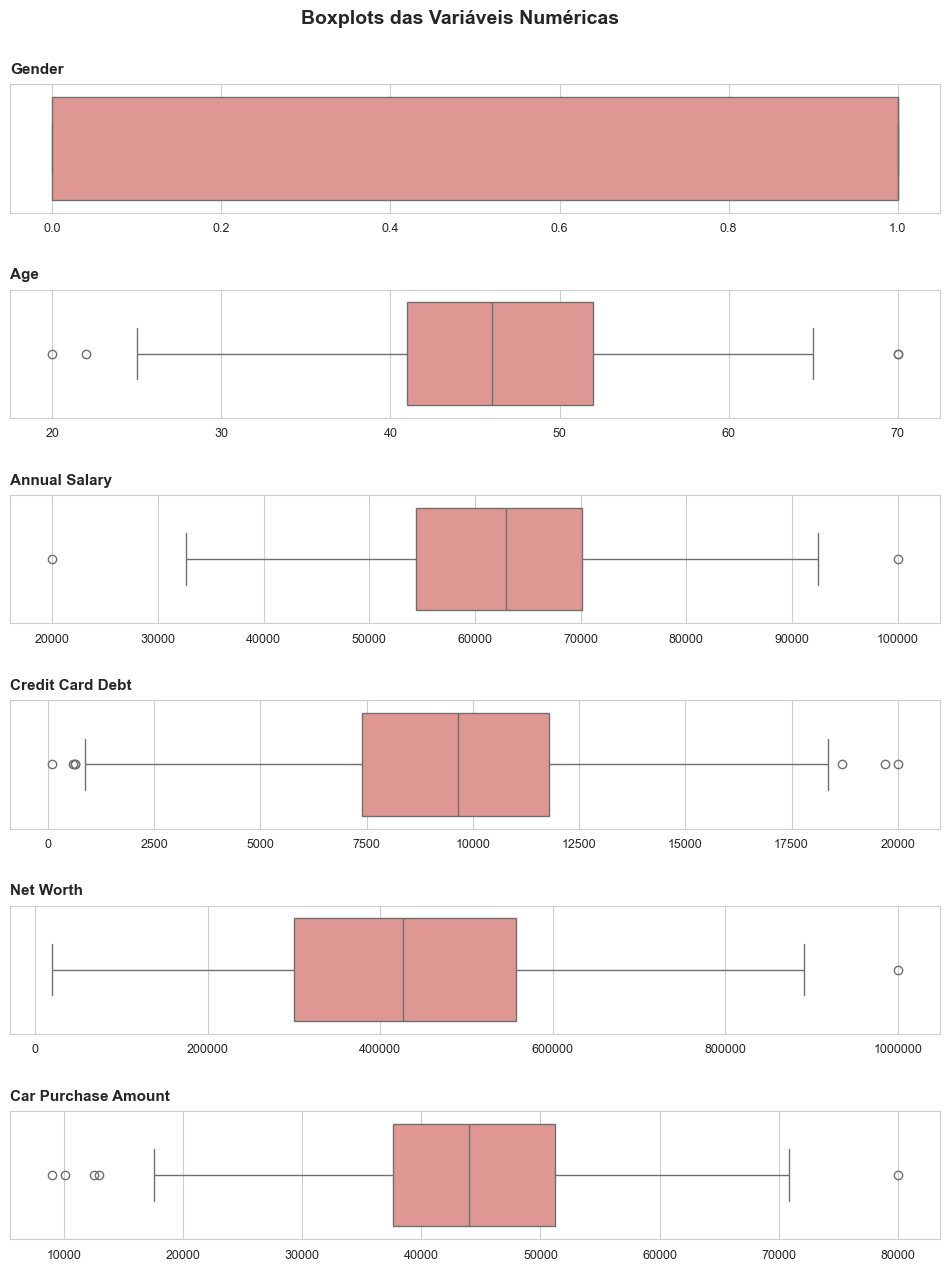

In [11]:
# Seleciona os nomes das colunas num√©ricas (float apenas)
colunas_numericas = df.select_dtypes(include=['number']).columns.tolist()

# Verifica se h√° colunas num√©ricas
if not colunas_numericas:
    print('Nenhuma vari√°vel num√©rica encontrada no DataFrame.')
else:
    # N√∫mero de boxplots a serem gerados
    n_plots = len(colunas_numericas)

    # Cria a figura com subplots verticais
    fig, axs = plt.subplots(n_plots, 1, figsize=(12, 2.5 * n_plots), 
                            gridspec_kw={'hspace': 0.6})

    # Garante que axs seja sempre uma lista (mesmo com 1 gr√°fico)
    if n_plots == 1:
        axs = [axs]

    # Loop pelas colunas para criar os boxplots
    for ax, col in zip(axs, colunas_numericas):
        sns.boxplot(x=df[col], ax=ax, color='#ea8c87', orient='h')
        ax.set_title(f'{col}', loc='left', fontsize=11, pad=8, fontweight='bold')
        ax.set(xlabel='', ylabel='')
        ax.tick_params(labelsize=9)
        ax.ticklabel_format(style='plain', axis='x')

    # Ajusta o layout e adiciona t√≠tulo geral
    fig.suptitle('Boxplots das Vari√°veis Num√©ricas', fontsize=14, fontweight='bold', y=0.93)
    plt.tight_layout(rect=[0, 0, 1, 0.97])  # evita sobreposi√ß√£o com t√≠tulo
    plt.show()


In [12]:
# Seleciona as vari√°veis num√©ricas
colunas_numericas = df.select_dtypes(include=['number'])

# Lista para armazenar as informa√ß√µes de outliers por coluna
resultados_outliers = []

for col in colunas_numericas:
    # Calcula quartis e intervalo interquartil (IIQ)
    Q1 = df[col].quantile(.25)
    Q3 = df[col].quantile(.75)
    IIQ = Q3 - Q1

    # Define limites inferior e superior para outliers
    limite_inferior = Q1 - 1.5 * IIQ
    limite_superior = Q3 + 1.5 * IIQ

    # Contagem de outliers abaixo e acima dos limites
    outliers_abaixo = (df[col] < limite_inferior).sum()
    outliers_acima = (df[col] > limite_superior).sum()
    
    # Calcula a quantidade total de outliers fora dos limites
    total_outliers = outliers_acima + outliers_abaixo
    
    # Calcula a porcentagem total de outliers fora dos limites
    total_outliers_perc = total_outliers / df.shape[0]
    
    # Armazena resultados em um dicion√°rio
    resultados_outliers.append({
        'Vari√°vel': col,
        'IIQ': IIQ,
        'Limite Inferior': limite_inferior,
        'Limite Superior': limite_superior,
        'Outliers Abaixo': outliers_abaixo,
        'Outliers Acima': outliers_acima,
        'Total Outliers': total_outliers,
        '% Outliers': round(total_outliers_perc * 100, 3)
    })
    
# Converte a lista de dicion√°rios em um DataFrame
df_outliers = pd.DataFrame(resultados_outliers) 

# Ordena o DataFrame pela % de outliers em ordem decrescente
df_outliers.sort_values(by='% Outliers', ascending=False, inplace=True)  

# Exibe o DataFrame com os resultados
print('\nResumo dos Outliers por Vari√°vel (ordenado por maior %)')
display(df_outliers.reset_index(drop=True))


Resumo dos Outliers por Vari√°vel (ordenado por maior %)


Vari√°vel            IIQ  Limite Inferior  Limite Superior  \
0     Credit Card Debt    4401.351696       795.488248     18400.895031   
1  Car Purchase Amount   13624.813477     17192.675824     71691.929734   
2                  Age      11.000000        24.500000        68.500000   
3        Annual Salary   15725.884810     30803.149980     93706.689220   
4            Net Worth  257500.282825    -86426.228337    943574.902962   
5               Gender       1.000000        -1.500000         2.500000   

   Outliers Abaixo  Outliers Acima  Total Outliers  % Outliers  
0                4               3               7         1.4  
1                4               1               5         1.0  
2                2               2               4         0.8  
3                1               1               2         0.4  
4                0               1               1         0.2  
5                0               0               0         0.0

### 3.6. Distribui√ß√£o da Vari√°vel 'Car Purchase Amount'

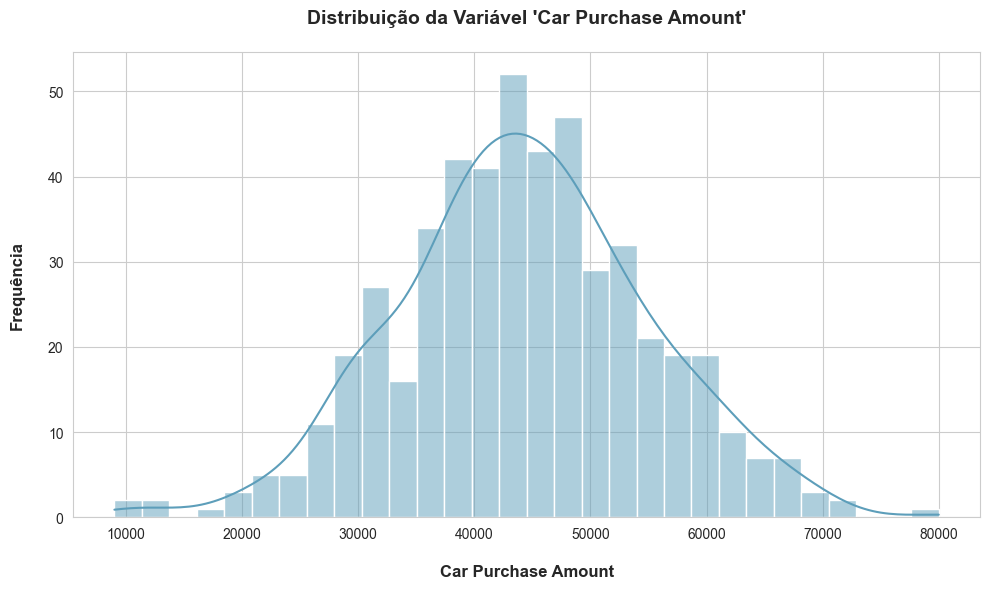

In [13]:
# Ajuste de tamanho da figura
plt.figure(figsize=(10, 6))

# Histograma com KDE
sns.histplot(data=df, x='Car Purchase Amount', bins=30, kde=True, color='#5d9eba', edgecolor='#ffffff')

# T√≠tulo e labels
plt.title('Distribui√ß√£o da Vari√°vel \'Car Purchase Amount\'\n', fontsize=14, fontweight='bold')
plt.xlabel('\nCar Purchase Amount', fontsize=12, fontweight='bold')
plt.ylabel('Frequ√™ncia\n', fontsize=12, fontweight='bold')

# Exibe o gr√°fico
plt.tight_layout()
plt.show()


In [14]:
def testar_normalidade(dataframe, coluna):
    '''
    Realiza testes estat√≠sticos de normalidade (Shapiro-Wilk e D‚ÄôAgostino-Pearson)
    para a vari√°vel num√©rica especificada.

    :param dataframe: DataFrame
        DataFrame contendo os dados a serem analisados.
    :param coluna: str
        Nome da coluna num√©rica a ser testada.
    :return: None
        Exibe os resultados dos testes e interpreta√ß√£o.
    '''

    # Remove valores ausentes da amostra
    amostra = dataframe[coluna].dropna()

    # Teste de Shapiro-Wilk
    shapiro_stat, shapiro_p = stats.shapiro(amostra)

    # Teste de D‚ÄôAgostino-Pearson
    dagostino_stat, dagostino_p = stats.normaltest(amostra)

    # Exibi√ß√£o dos resultados
    print(f'\nüìå Teste de Normalidade ‚Äî {coluna}\n')
    print(f'- Shapiro-Wilk:       Estat√≠stica = {shapiro_stat:.4f} | p-valor = {shapiro_p:.4f}')
    print(f'- D\'Agostino-Pearson: Estat√≠stica = {dagostino_stat:.4f} | p-valor = {dagostino_p:.4f}\n')

    # Interpreta√ß√£o
    if shapiro_p > 0.05 and dagostino_p > 0.05:
        print('‚úÖ A vari√°vel apresenta distribui√ß√£o normal (n√£o rejeita H‚ÇÄ nos dois testes).')
    else:
        print('‚ö†Ô∏è A vari√°vel n√£o apresenta distribui√ß√£o normal (rejeita H‚ÇÄ em pelo menos um teste).')


In [15]:
testar_normalidade(df, 'Car Purchase Amount')


üìå Teste de Normalidade ‚Äî Car Purchase Amount

- Shapiro-Wilk:       Estat√≠stica = 0.9972 | p-valor = 0.5566
- D'Agostino-Pearson: Estat√≠stica = 1.2039 | p-valor = 0.5477

‚úÖ A vari√°vel apresenta distribui√ß√£o normal (n√£o rejeita H‚ÇÄ nos dois testes).


## 4. An√°lise explorat√≥ria dos dados

### 4.1. Qual a distribui√ß√£o da idade dos clientes?

In [16]:
# Agrupar idades num√©ricas em faixas et√°rias

# Faixas et√°rias (limites)
bins = [0, 24, 34, 44, 54, 64, 74, 84, 94, 150]

# Agrupar idades num√©ricas em faixas et√°rias
labels = [
    'menos de 25 anos',
    '25 a 34 anos',
    '35 a 44 anos',
    '45 a 54 anos',
    '55 a 64 anos',
    '65 a 74 anos',
    '75 a 84 anos',
    '85 a 94 anos',
    'mais de 95 anos'
]

# Criando a coluna de faixa et√°ria
df['AGE_GROUP'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True, include_lowest=True)

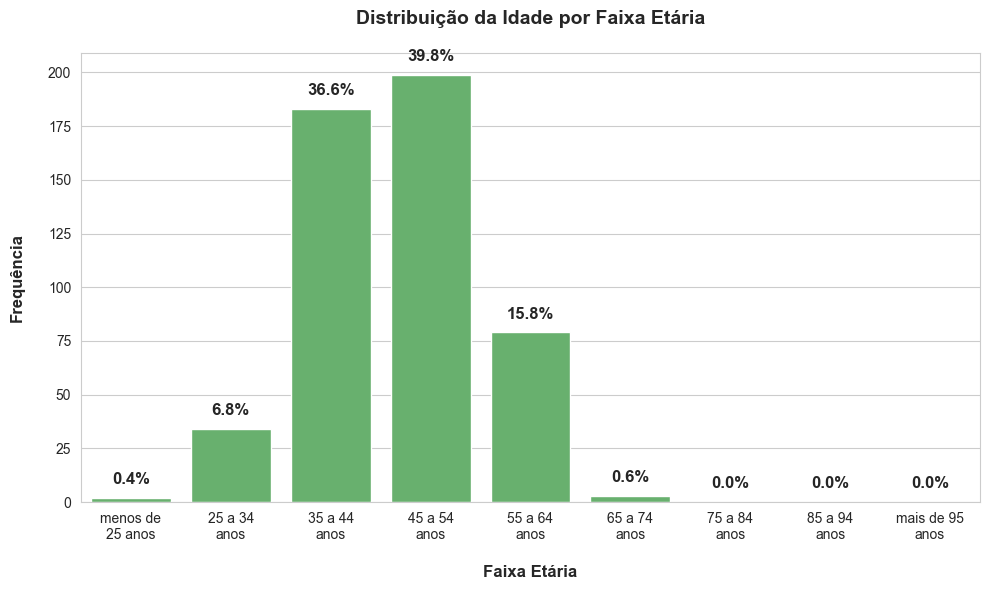

In [47]:
# Conta a frequ√™ncia de cada faixa et√°ria
age_group_counts = df['AGE_GROUP'].value_counts().sort_index()

# Calcula o total para o percentual
total = age_group_counts.sum()

# Usa textwrap para quebrar automaticamente os r√≥tulos longos do eixo x
x_labels = [textwrap.fill(label, width=10) for label in age_group_counts.index.astype(str)]

# Ajuste do tamanho da figura
plt.figure(figsize=(10, 6))

# Cria√ß√£o do barplot
ax = sns.barplot(x=x_labels, y=age_group_counts.values, palette=['#5cbc64'], edgecolor='#fff'
)

# T√≠tulo e labels
plt.title('Distribui√ß√£o da Idade por Faixa Et√°ria\n', fontsize=14, fontweight='bold')
plt.xlabel('\nFaixa Et√°ria', fontsize=12, fontweight='bold')
plt.ylabel('Frequ√™ncia\n', fontsize=12, fontweight='bold')

# Adicionando os percentuais sobre as barras
for i, count in enumerate(age_group_counts.values):
    percentage = (count / total) * 100
    ax.text(i, count + total * 0.01, f'{percentage:.1f}%', 
            ha='center', va='bottom', fontsize=12, fontweight='bold')

# Layout final
plt.tight_layout()
plt.show()


### 4.2. O g√™nero dos clientes est√° balanceado?

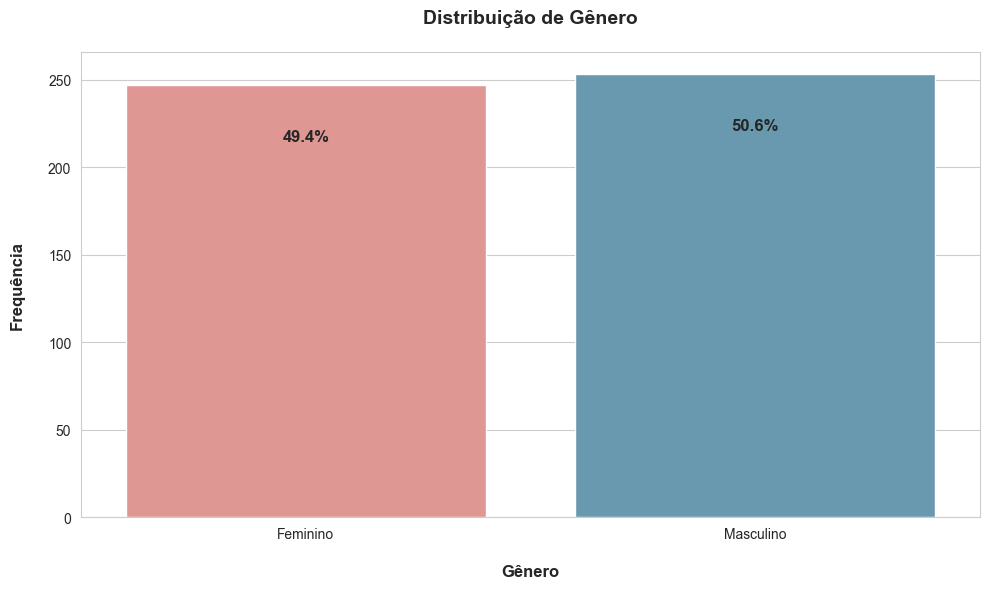

In [48]:
# Conta a frequ√™ncia de cada g√™nero
gender_counts = df['Gender'].value_counts().sort_index()

# Calcula o total para o percentual
total = gender_counts.sum()

# Ajuste do tamanho da figura
plt.figure(figsize=(10, 6))

# Cria√ß√£o do barplot
ax = sns.barplot(x=gender_counts.index, y=gender_counts.values,
    palette=['#ea8c87', '#5d9eba'], edgecolor='#fff'
)

# Alterando os valores do r√≥tulos
ax.set_xticks([0, 1])
ax.set_xticklabels(['Feminino', 'Masculino'])

# T√≠tulo e r√≥tulos
plt.title('Distribui√ß√£o de G√™nero\n', fontsize=14, fontweight='bold')
plt.xlabel('\nG√™nero', fontsize=12, fontweight='bold')
plt.ylabel('Frequ√™ncia\n', fontsize=12, fontweight='bold')

# Adicionando os percentuais sobre as barras
for i, count in enumerate(gender_counts.values):
    percentage = (count / total) * 100
    ax.text(i, count - total * 0.05, f'{percentage:.1f}%', 
            ha='center', va='top', fontsize=12, fontweight='bold')

# Layout final
plt.tight_layout()
plt.show()

### 4.3. H√° diferen√ßa de idade m√©dia entre g√™neros?

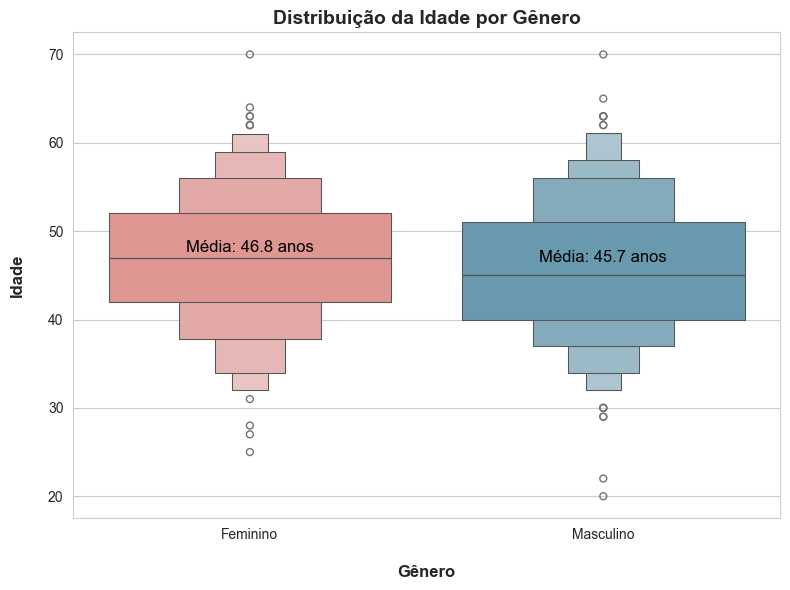

In [ ]:
# Ajuste do tamanho da figura
plt.figure(figsize=(8, 6))

# Calcula a m√©dia de idade por g√™nero
media_idade = df.groupby('Gender')['Age'].mean()

# Gr√°fico da idade por g√™nero
ax = sns.boxenplot(data=df, x='Gender', y='Age', palette=['#ea8c87', '#5d9eba'])

# Adiciona anota√ß√µes de m√©dia
for i, gender in enumerate(media_idade.index):
    media = media_idade[gender]
    ax.text(i, media + 0.5, f'M√©dia: {media:.1f} anos', 
            ha='center', va='bottom', fontsize=12, color='#000')

# Alterando os valores do r√≥tulos
ax.set_xticks([0, 1])
ax.set_xticklabels(['Feminino', 'Masculino'])

# T√≠tulo e r√≥tulos
plt.title('Distribui√ß√£o da Idade por G√™nero', fontsize=14, fontweight='bold')
plt.xlabel('\nG√™nero', fontsize=12, fontweight='bold')
plt.ylabel('Idade\n', fontsize=12, fontweight='bold')

# Layout final
plt.tight_layout()
plt.show()

### 4.4. O valor m√©dio de compra difere entre g√™neros?

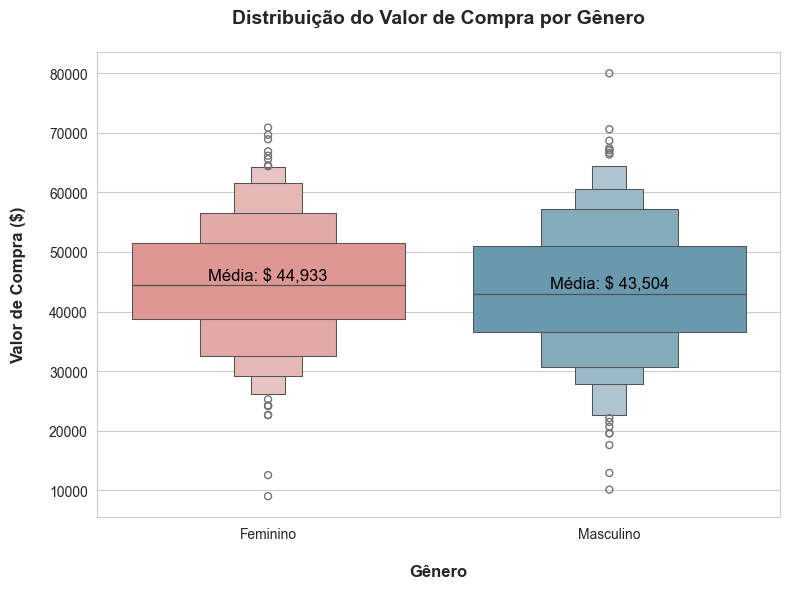

In [ ]:
# Ajuste do tamanho da figura
plt.figure(figsize=(8, 6))

# C√°lculo a m√©dia de compra por g√™nero
media_compra = df.groupby('Gender')['Car Purchase Amount'].mean()

# Gr√°fico do valor de compra por g√™nero
ax = sns.boxenplot(data=df, x='Gender', y='Car Purchase Amount', 
                   palette=['#ea8c87', '#5d9eba'])

# Adiciona anota√ß√µes de m√©dia
for i, gender in enumerate(media_compra.index):
    media = media_compra[gender]
    ax.text(i, media + 0.5, f'M√©dia: $ {media:,.0f}', 
            ha='center', va='bottom', fontsize=12, color='#000')

# Alterando os valores do r√≥tulos
ax.set_xticks([0, 1])
ax.set_xticklabels(['Feminino', 'Masculino'])

# T√≠tulo e r√≥tulos
plt.title('Distribui√ß√£o do Valor de Compra por G√™nero\n', fontsize=14, fontweight='bold')
plt.xlabel('\nG√™nero', fontsize=12, fontweight='bold')
plt.ylabel('Valor de Compra ($)\n', fontsize=12, fontweight='bold')

# Layout final
plt.tight_layout()
plt.show()


### 4.5. Idade influencia o valor do carro comprado?

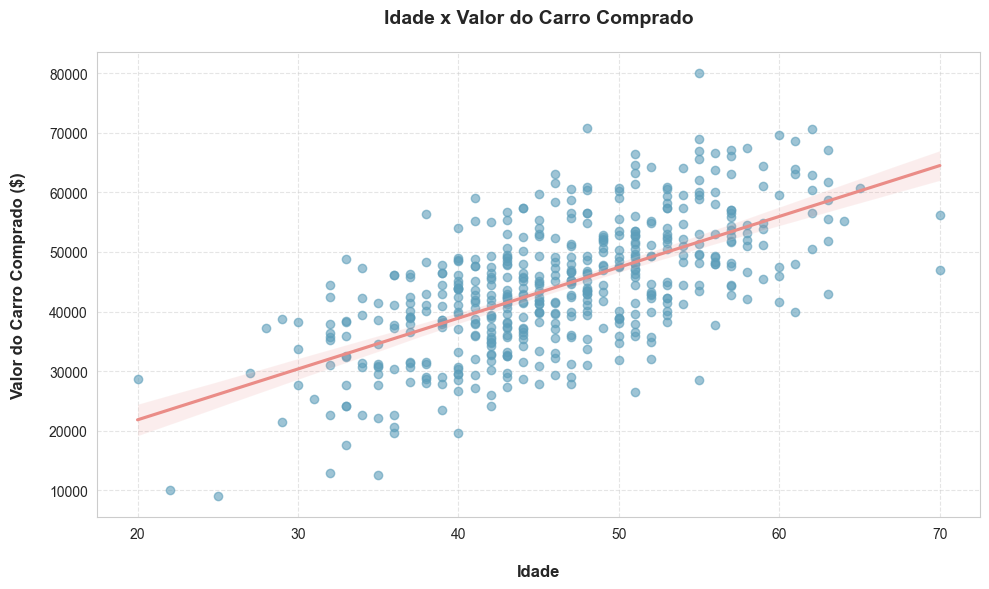

In [101]:
# Ajuste do tamanho da figura
plt.figure(figsize=(10, 6))

# Gr√°fico do valor de compra por idade
sns.regplot(data=df, x='Age', y='Car Purchase Amount',
    scatter_kws={'alpha': 0.6, 'color': '#5d9eba'}, line_kws={'color': '#ea8c87'})

plt.title('Idade x Valor do Carro Comprado\n', fontsize=14, fontweight='bold')
plt.xlabel('\nIdade', fontsize=12, fontweight='bold')
plt.ylabel('Valor do Carro Comprado ($)\n', fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)

# Layout final
plt.tight_layout()
plt.show()
